# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Muhammad Rifqi Nur Aziz
- **Email:** m295b4ky3045@bangkit.academy
- **ID Dicoding:** muhammad_rifqi_nur_aziz_m295b4ky3045_t328

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rental sepeda selama 2 tahun tersebut?
- Adakah korelasi antara jumlah order rental dengan parameter suhu, cuaca, kelembapan, dan kecepatan angin?
- Bagaimana pola jumlah order harian, order bulanan, dan order musiman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### membuka dan membaca file "day.csv" dan "hour.csv"

In [3]:
df_day = pd.read_csv("data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour = pd.read_csv("data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada tabel pertama merupakan data rental sepeda selama 2 tahun. Data tersebut menunjukan bahwa total rental sepeda harian dengan nilai yang bervariasi
- pada tabel kedua merupakan data rental sepeda yang lebih rinci. Data tersebut dicatat per jam dalam satu hari.

### Assessing Data

#### check any information and duplicated value from the data

In [7]:
df_day.info()
print("jumlah duplikasi: ", df_day.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
jumlah duplikasi:  0


In [9]:
df_hour.info()
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


#### check missing values from the data

In [11]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### check the parameter statistic descriptive from the data

In [15]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada data "day.csv" tidak ada data yang hilang ataupun terduplikasi, hanya terdapat kesalahan tipe data, yaitu pada kolom "dteday" yang bertipe data object. 
- begitu juga pada data "hour.csv" tidak ada data yang hilang ataupun terduplikasi, hanya terdapat kesalahan tipe data, yaitu pada kolom "dteday" yang bertipe data object.

### Cleaning Data

#### menghapus data yang tidak digunakan

In [19]:
del df_hour

#### merubah tipe data pada kolom "dteday" sesuai dengan format tanggal

In [21]:
datetime_day = ["dteday"]

for column in datetime_day:
    df_day[column] = pd.to_datetime(df_day[column])

In [23]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### menghapus kolom yang tidak digunakan, serta menyatukan kolom 'temp' dan 'atemp' menjadi 'temp_avg'

In [25]:
df_day['temp_avg'] = df_day[['temp', 'atemp']].mean(axis=1)
df_day.drop(columns=['instant', 'yr', 'temp', 'atemp'], inplace=True)

df_day.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_avg
0,2011-01-01,1,1,0,6,0,2,0.805833,0.160446,331,654,985,0.353896
1,2011-01-02,1,1,0,0,0,2,0.696087,0.248539,131,670,801,0.358608
2,2011-01-03,1,1,0,1,1,1,0.437273,0.248309,120,1229,1349,0.192885
3,2011-01-04,1,1,0,2,1,1,0.590435,0.160296,108,1454,1562,0.206061
4,2011-01-05,1,1,0,3,1,1,0.436957,0.186900,82,1518,1600,0.228113


#### mengkategorikan kolom season dan weathersit

In [27]:
# Kategorisasi 'season'
season_map = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}
df_day['season'] = df_day['season'].map(season_map)

# Kategorisasi 'weathersit'
weathersit_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Ice Pallets'
}
df_day['weathersit'] = df_day['weathersit'].map(weathersit_map)

#### merubah tipe data pada kolom 'season' dan 'weathersit' 

In [29]:
df_day['season'] = df_day.season.astype('category')
df_day['weathersit'] = df_day.weathersit.astype('category')

In [31]:
df_day.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_avg
0,2011-01-01,Winter,1,0,6,0,Misty/Cloudy,0.805833,0.160446,331,654,985,0.353896
1,2011-01-02,Winter,1,0,0,0,Misty/Cloudy,0.696087,0.248539,131,670,801,0.358608
2,2011-01-03,Winter,1,0,1,1,Clear/Partly Cloudy,0.437273,0.248309,120,1229,1349,0.192885
3,2011-01-04,Winter,1,0,2,1,Clear/Partly Cloudy,0.590435,0.160296,108,1454,1562,0.206061
4,2011-01-05,Winter,1,0,3,1,Clear/Partly Cloudy,0.436957,0.186900,82,1518,1600,0.228113


In [33]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   mnth        731 non-null    int64         
 3   holiday     731 non-null    int64         
 4   weekday     731 non-null    int64         
 5   workingday  731 non-null    int64         
 6   weathersit  731 non-null    category      
 7   hum         731 non-null    float64       
 8   windspeed   731 non-null    float64       
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  cnt         731 non-null    int64         
 12  temp_avg    731 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(7)
memory usage: 64.7 KB


**Insight:**
- saya membuang data yang tidak terlalu digunakan seperti "instant, yr, temp, dan atemp" yang digantikan dengan "temp_avg" agar tidak bias
- membuat pengkategorian data untuk kolom 'season' dan 'weathersit' untuk memudahkan menemukan pola

## Exploratory Data Analysis (EDA)

### Explore ...

#### mengambil 20 sampel data secara acak untuk memastikan data tidak ada yang hilang setelah dilakukan pembersihan data

In [35]:
df_day.sample(20)

,dteday,season,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_avg
163,2011-06-13,Spring,6,0,1,1,Clear/Partly Cloudy,0.494583,0.305350,863,4157,5020,0.618327
184,2011-07-04,Summer,7,1,1,0,Misty/Cloudy,0.637917,0.081479,3065,2978,6043,0.696042
280,2011-10-08,Fall,10,0,6,0,Clear/Partly Cloudy,0.701250,0.045404,2235,3174,5409,0.517454
461,2012-04-06,Spring,4,0,5,1,Clear/Partly Cloudy,0.377083,0.300388,1807,4653,6460,0.397050
388,2012-01-24,Winter,1,0,2,1,Clear/Partly Cloudy,0.835833,0.123767,439,3900,4339,0.345804
705,2012-12-06,Fall,12,0,4,1,Clear/Partly Cloudy,0.508750,0.174754,340,5035,5375,0.257018
45,2011-02-15,Winter,2,0,2,1,Clear/Partly Cloudy,0.314348,0.291374,140,1675,1815,0.260181
552,2012-07-06,Summer,7,0,5,1,Clear/Partly Cloudy,0.450833,0.146142,1366,4841,6207,0.790433
523,2012-06-07,Spring,6,0,4,1,Clear/Partly Cloudy,0.567083,0.157350,1038,6456,7494,0.585971
565,2012-07-19,Summer,7,0,4,1,Clear/Partly Cloudy,0.600417,0.165429,888,5703,6591,0.742321


#### memanggil parameter statistika untuk update informasi setelah dilakukan pembersihan data

In [37]:
df_day.describe(include="all")

,dteday,season,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_avg
count,731,731,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,NaN,NaN,NaN,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,6.519836,0.028728,2.997264,0.683995,NaN,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.484869
min,2011-01-01 00:00:00,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.022392,2.000000,20.000000,22.000000,0.069100
25%,2011-07-02 12:00:00,NaN,4.000000,0.000000,1.000000,0.000000,NaN,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.335403
50%,2012-01-01 00:00:00,NaN,7.000000,0.000000,3.000000,1.000000,NaN,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.491498
75%,2012-07-01 12:00:00,NaN,10.000000,0.000000,5.000000,1.000000,NaN,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.632488
max,2012-12-31 00:00:00,NaN,12.000000,1.000000,6.000000,1.000000,NaN,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.844615


#### melakukan grouping guna memudahkan melihat rata-rata dari data harian, bulanan, dan musiman

In [39]:
df_day.groupby('weekday', observed=False).agg({
    'cnt': 'mean',
    'temp_avg': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

,cnt,temp_avg,hum,windspeed
weekday,,,,
0,4228.828571,0.474458,0.627659,0.188530
1,4338.123810,0.484006,0.637577,0.190691
2,4510.663462,0.493809,0.641829,0.191825
3,4548.538462,0.493118,0.645368,0.187736
4,4667.259615,0.493521,0.609499,0.191603
5,4690.288462,0.483351,0.613756,0.186389
6,4550.542857,0.472055,0.619560,0.196588


In [41]:
df_day.groupby('mnth', observed=False).agg({
    'cnt': 'mean',
    'temp_avg': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

,cnt,temp_avg,hum,windspeed
mnth,,,,
1,2176.338710,0.238120,0.585828,0.206303
2,2655.298246,0.299479,0.567465,0.215684
3,3692.258065,0.386246,0.588475,0.222699
4,4484.900000,0.463540,0.588063,0.234482
5,5349.774194,0.580230,0.688958,0.182989
6,5772.366667,0.661171,0.575806,0.185420
7,5563.677419,0.729782,0.597876,0.166059
8,5664.419355,0.680028,0.637730,0.172918
9,5766.516667,0.597892,0.714714,0.165945


In [43]:
df_day.groupby('season', observed=False).agg({
    'cnt': 'mean',
    'temp_avg': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
})

,cnt,temp_avg,hum,windspeed
season,,,,
Fall,4728.162921,0.419222,0.668719,0.171995
Spring,4992.331522,0.532356,0.626948,0.203507
Summer,5644.303191,0.681104,0.633482,0.172095
Winter,2604.132597,0.297331,0.582903,0.214537


**Insight:**
- pengecekan kembali pada data setelah dilakukan pembersihan data dengan cara mengambil beberapa sample dan pengecekan melalui statistika deskriptif
- pada kolom 'weekday', nilai 0 sama dengan hari senin, nilai 1 sama dengan hari selasa, begitu seterusnya sampai nilai 6 menandakan hari minggu. Kemudian pada kolom 'mnth', nilai 1 menunjukkan awal bulan yaitu bulan Januari, begitu seterusnya sampa dengan nilai 12 yang menunjukkan bulan Desember. Pada kolom 'season' terdapat 4 nilai yang masing-masing menandakan suatu musim. pada nilai 1 menandakan musim dingin, nilai 2 menandakan musim semi, nilai 3 musim panas, dan nilai 4 menandakan nilai musim gugur
- Dari ketiga parameter waktu tersebut, saya melakukan grouping untuk melihat rata-rata dari beberapa parameter dan order data yang terjual pada waktu tertentu. Pada grup 'weekday', rata-rata order terbanyak pada **hari Sabtu** dengan rata-rata sekitar **4690.288462**. Pada grup 'mnth', rata-rata pengguna melakukan order terbanyak pada **bulan Juni** dengan nilai **5772.366667**. Pada grup 'season', jumlah pengguna dan rata-rata terbanyak terdapat di musim ke 3 yaitu **musim panas** sekitar **5644.303191**.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren rental sepeda selama 2 tahun tersebut?

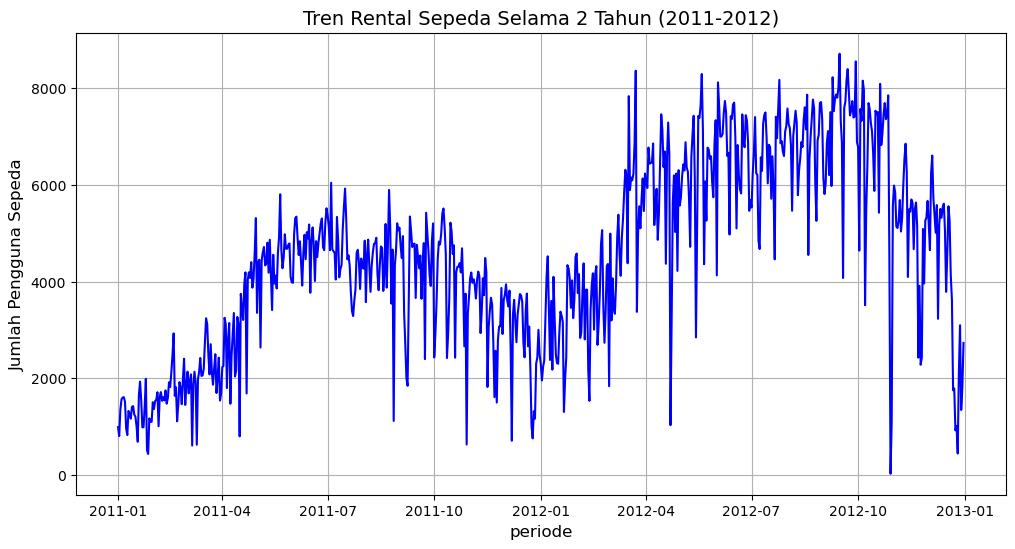

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=df_day, color='blue')

# Menambahkan judul dan label
plt.title('Tren Rental Sepeda Selama 2 Tahun (2011-2012)', fontsize=14)
plt.xlabel('periode', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.grid(True)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Adakah korelasi antara jumlah order rental dengan parameter suhu, cuaca, kelembapan, dan kecepatan angin?

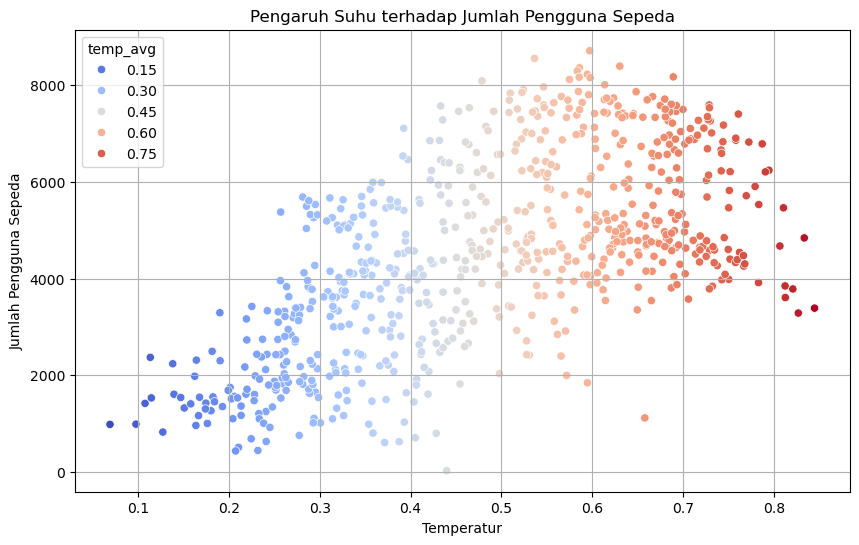

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_avg', y='cnt', data=df_day, hue='temp_avg', palette='coolwarm')
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.grid(True)
plt.show()

In [61]:
weathersit_counts = df_day['weathersit'].value_counts().sort_index()
print(weathersit_counts)

weathersit
Clear/Partly Cloudy      463
Light Snow/Light Rain     21
Misty/Cloudy             247
Name: count, dtype: int64


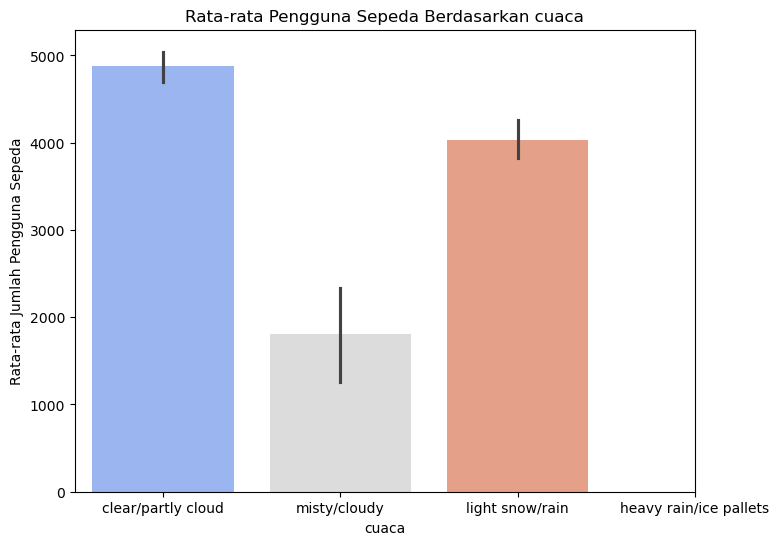

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=df_day, hue='weathersit', palette='coolwarm')
plt.title('Rata-rata Pengguna Sepeda Berdasarkan cuaca')
plt.xlabel('cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['clear/partly cloud', 'misty/cloudy', 'light snow/rain', 'heavy rain/ice pallets'])
plt.show()

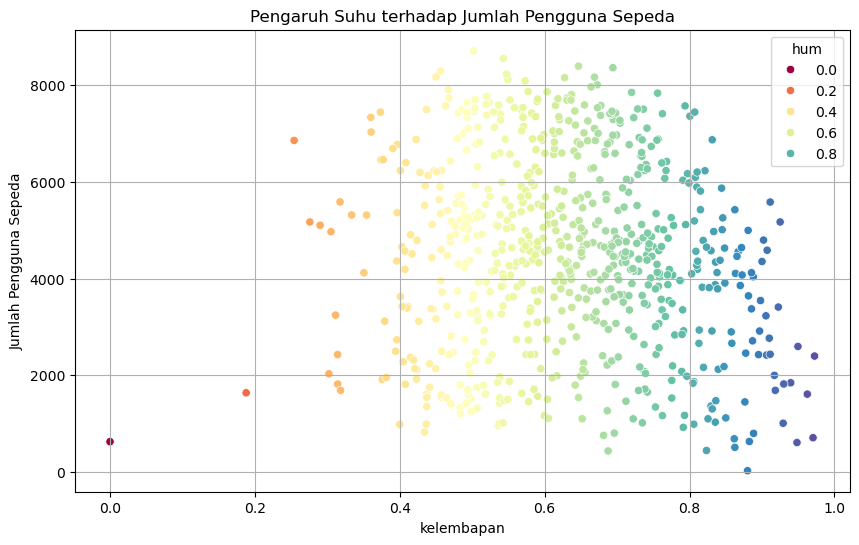

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df_day, hue='hum', palette='Spectral')
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda')
plt.xlabel('kelembapan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.grid(True)
plt.show()

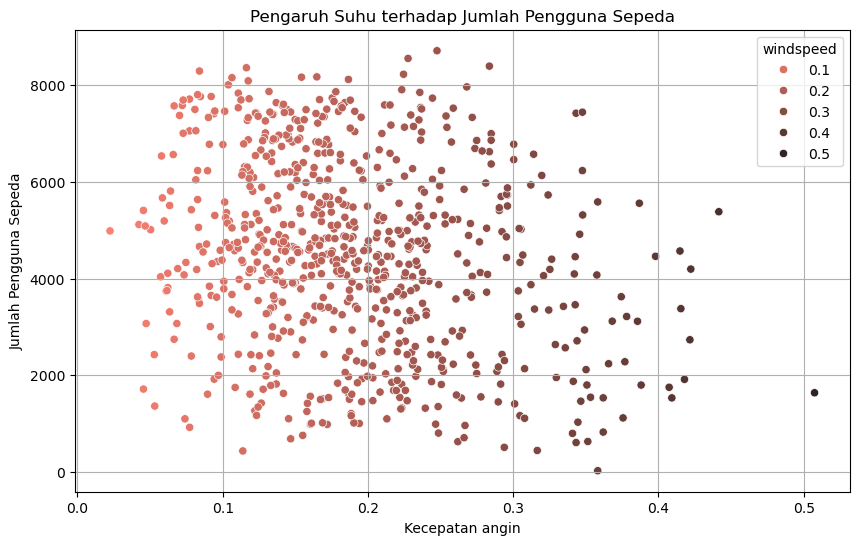

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=df_day, hue='windspeed', palette='dark:salmon_r')
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kecepatan angin')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana pola jumlah order harian, order bulanan, dan order musiman?

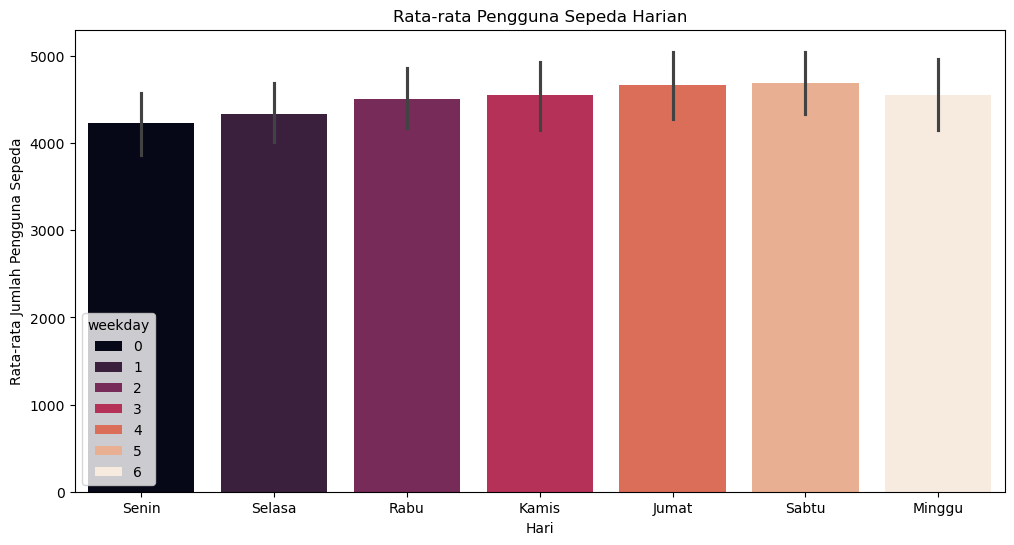

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='cnt', data=df_day, hue='weekday', palette='rocket')
plt.title('Rata-rata Pengguna Sepeda Harian')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

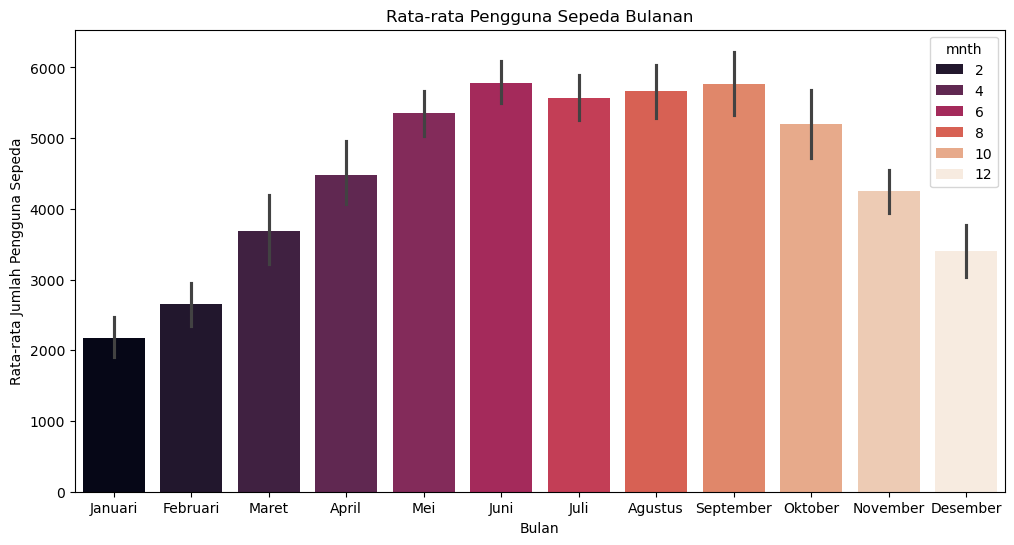

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=df_day, hue='mnth', palette='rocket')
plt.title('Rata-rata Pengguna Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])
plt.show()

C:\Users\Rifqi\AppData\Local\Temp\ipykernel_5312\2809690302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_group = df_day.groupby('season').agg({'cnt': 'mean'}).reset_index()


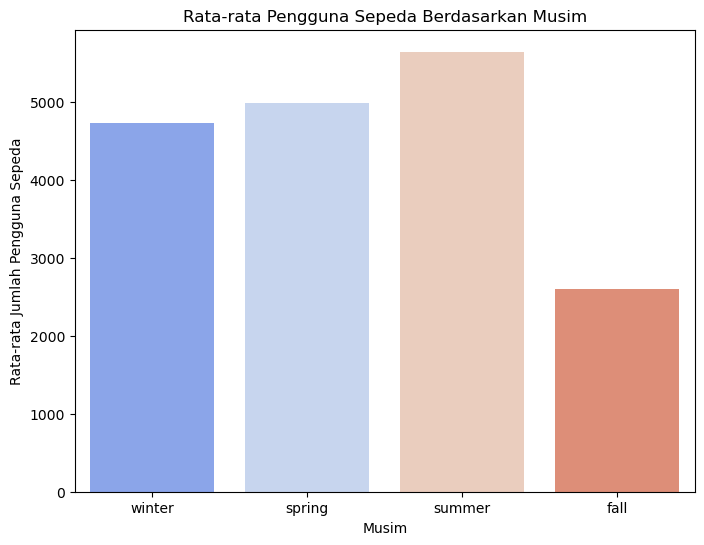

In [89]:
season_group = df_day.groupby('season').agg({'cnt': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_group, hue='season', palette='coolwarm')
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['winter', 'spring', 'summer', 'fall'])
plt.show()

**Insight:**
- Pada hasil grafik tren order rental sepeda selama 2 tahun menunjukkan data yang fluktuatif
- Penggunaan scatter plot dalam melihat jumlah order rental sepeda berdasarkan beberapa parameter menunjukkan bahwa mayoritas pengguna cenderung menggunakan sepeda pada suhu dan kelembapan yang normal (0.5 - 0.6). selain itu, pengguna juga memperhatikan tingkat kecepatan angin dan kondisi cuaca. Dengan kondisi cuaca yang cerah serta kecepatan angin yang kecil, hal tersebut dapat meningkatkan jumlah order pada rental
- Pola penggunaan jumlah sepeda juga dapat ditemukan berdasarkan waktu. Pada data harian, rata-rata pengguna melakukan order rental sepeda pada hari Sabtu. Pada data bulanan, rata-rata pengguna melakukan order sepeda di bulan Juni. Dan pada data musiman, rata-rata pengguna melakukan order rental sepeda di musim panas (summer)

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari pertanyaan analisis 1, dapat disimpulkan bahwa tren grafik order rental sepeda cenderung fluktuatif. Hal tersebut dapat disebabkan oleh beberapa faktor seperti musim, cuaca, suhu, dan faktor lainnya. puncak tertinggi dari pengguna rental sepeda harian adalah 8714 pengguna dan terendahnya adalah 22
- dari pertanyaan analisis 2, dapat disimpulkan bahwa memang benar adanya faktor yang mempengaruhi jumlah pengguna. dapat dilihat dari visualisasi scatterplot dan barplot yang menunjukkan korelasi antara jumlah pengguna dengan suhu, cuaca, kelembapan dan kecepatan angin. Pengguna menyukai kegiatan bersepeda dengan suhu dan kelembaban yang normal (0.5 - 0.6). Sementara itu, pada faktor cuaca dan kecepatan angin, jumlah pengguna dapat lebih banyak pada cuaca yang cerah serta kecepatan angin yang cenderung ringan. Dengan hasil visualisasi data ini, kita dapat menyiapkan sepeda lebih banyak pada waktu-waktu tertentu supaya dapat memaksimalkan kualitas pelayanan
- Dari pernyataan analisis 3, dapat disimpulkan bahwa pengguna bersepeda pada weekend (Sabtu). Dalam satu tahun, pengguna lebih banyak melakukan order rental sepeda di bulan Juni yang juga berkaitan dengan musim panas. 